In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IsingModel.Ising2 import IsingGrid

In [2]:
# Test basics
g = IsingGrid(3, 4)
g.constant_init(0, 4, 1)
print(g.energy(-np.ones([3, 4])))
print(g.energy(np.zeros([3, 4])))
print(g.energy(np.random.rand(3, 4)))
g.random_init()
print(g.energy(-np.ones([3, 4])))
print(g.energy(np.zeros([3, 4])))
print(g.energy(np.random.rand(3, 4)))

-20.5
-0.0
-5.8902855079
-6.62830527861
-0.0
0.533420641298


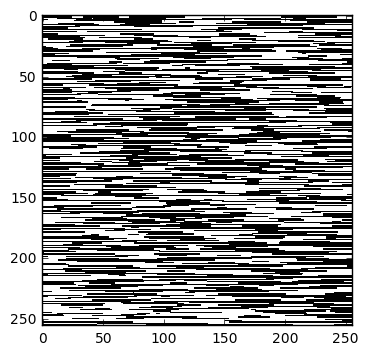

In [3]:
# Test Gibbs sampling
model = IsingGrid(256,256)
model.constant_init(0,0,100)
sample = model.random_grid(0.5)
sample,elist = model.gibbs_sampling(sample)
plt.imshow(sample, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

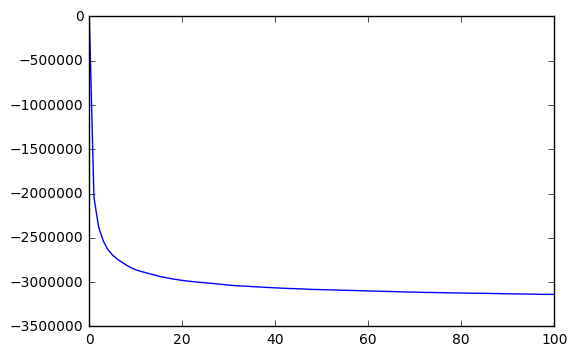

In [4]:
plt.plot(elist)
plt.autoscale(enable=True, axis='both', tight=None)

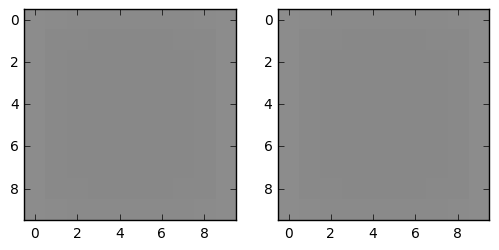

In [5]:
# test meanfield
model = IsingGrid(10,10)
model.constant_init(-3,1,3)
mlist1 = model.meanfields(model.gibbs_sampling(model.random_grid(0.6))[0])
plt.subplot(121)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

mlist2 = model.meanfields(model.random_grid(0))
plt.subplot(122)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

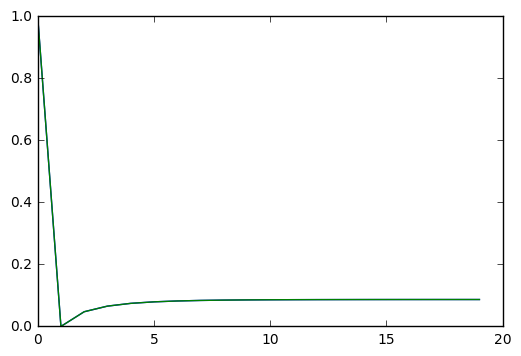

In [6]:
plt.plot(mlist1)
plt.plot(mlist2)

In [7]:
model.gibbs_sampling(model.random_grid(0.4))[0]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [9]:
def save_video(dirname, video):
    if os.path.exists(dirname):
        return
    else:
        os.makedirs(dirname)
    for t in range(video.shape[0]):
        plt.imshow(video[t], interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
        plt.savefig(dirname + "/frame" + str(t).zfill(4)+".png")
    plt.close()

In [14]:
model = IsingGrid(256,256)
model.constant_init(0,.75,.75)
video, elist = model.gibbs_video(model.random_grid(0.9),time_max=100)
save_video("images/video8",video)

In [ ]:
finalenergylist = []
numbiterlist =[]
for a in np.linspace(0.02, 2, 10):
    ising = IsingGrid(n=256, a=a)
    ising.randomflips(.3)
    elist = ising.samplegibbs()
    numbiterlist.append(len(elist))
    finalenergylist.append(int(elist[-1]/a))
    ising.savegrid('im' + str(int(100*a)).zfill(3))

print(numbiterlist)
print(finalenergylist)

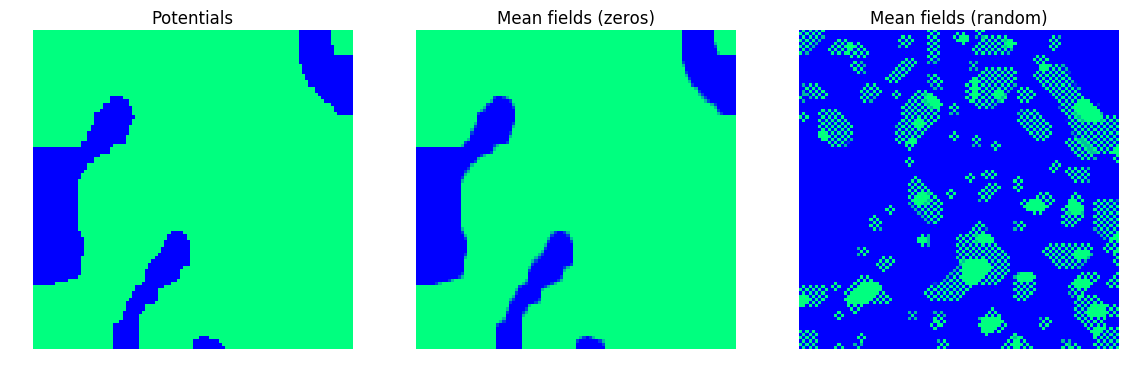

In [2]:
model = IsingGrid(100, 100)
model.constant_init(0,10,10)
grid = model.random_grid(0.3)
model.linear_factors = model.gibbs_sampling(model.random_grid(.55))[0]
plt.figure(figsize=(14,12))
plt.subplot(131)
plt.title('Potentials')
plt.axis('off')
plt.imshow(model.linear_factors, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.meanfields(np.zeros((model.height,model.width)))
plt.subplot(132)
plt.title('Mean fields (zeros)')
plt.axis('off')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.meanfields(grid)
plt.subplot(133)
plt.title('Mean fields (random)')
plt.axis('off')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

plt.savefig('images/meanfield_qui_chie_a10.png')

In [3]:
observation1 = np.zeros((model.height, model.width))
observation2 = np.zeros((model.height, model.width))
observation3 = np.zeros((model.height, model.width))

observation1[model.height//2-10:model.height//2+10,model.width//2-10:model.width//2+10] = 1
observation1[0,1:-1] = -1
observation1[-1,1:-1] = -1
observation1[1:-1,0] = -1
observation1[1:-1,-1] = -1
observation2[:2,1:-1] = 1
observation2[-2:,1:-1] = 1
observation2[1:-1,:2] = -1
observation2[1:-1,-2:] = -1
for i in range(min(model.height,model.width)):
    observation3[i,i] = 1
observation3[0,-1] = -1
observation3[-1,0] = -1

/Users/remilepriol/Dropbox/MVA/PGM/Project/IsingModel/Ising2.py:211: RuntimeWarning: invalid value encountered in true_divide
  newmessages[k] /= np.expand_dims(np.sum(newmessages[k], axis=-1), axis=-1)


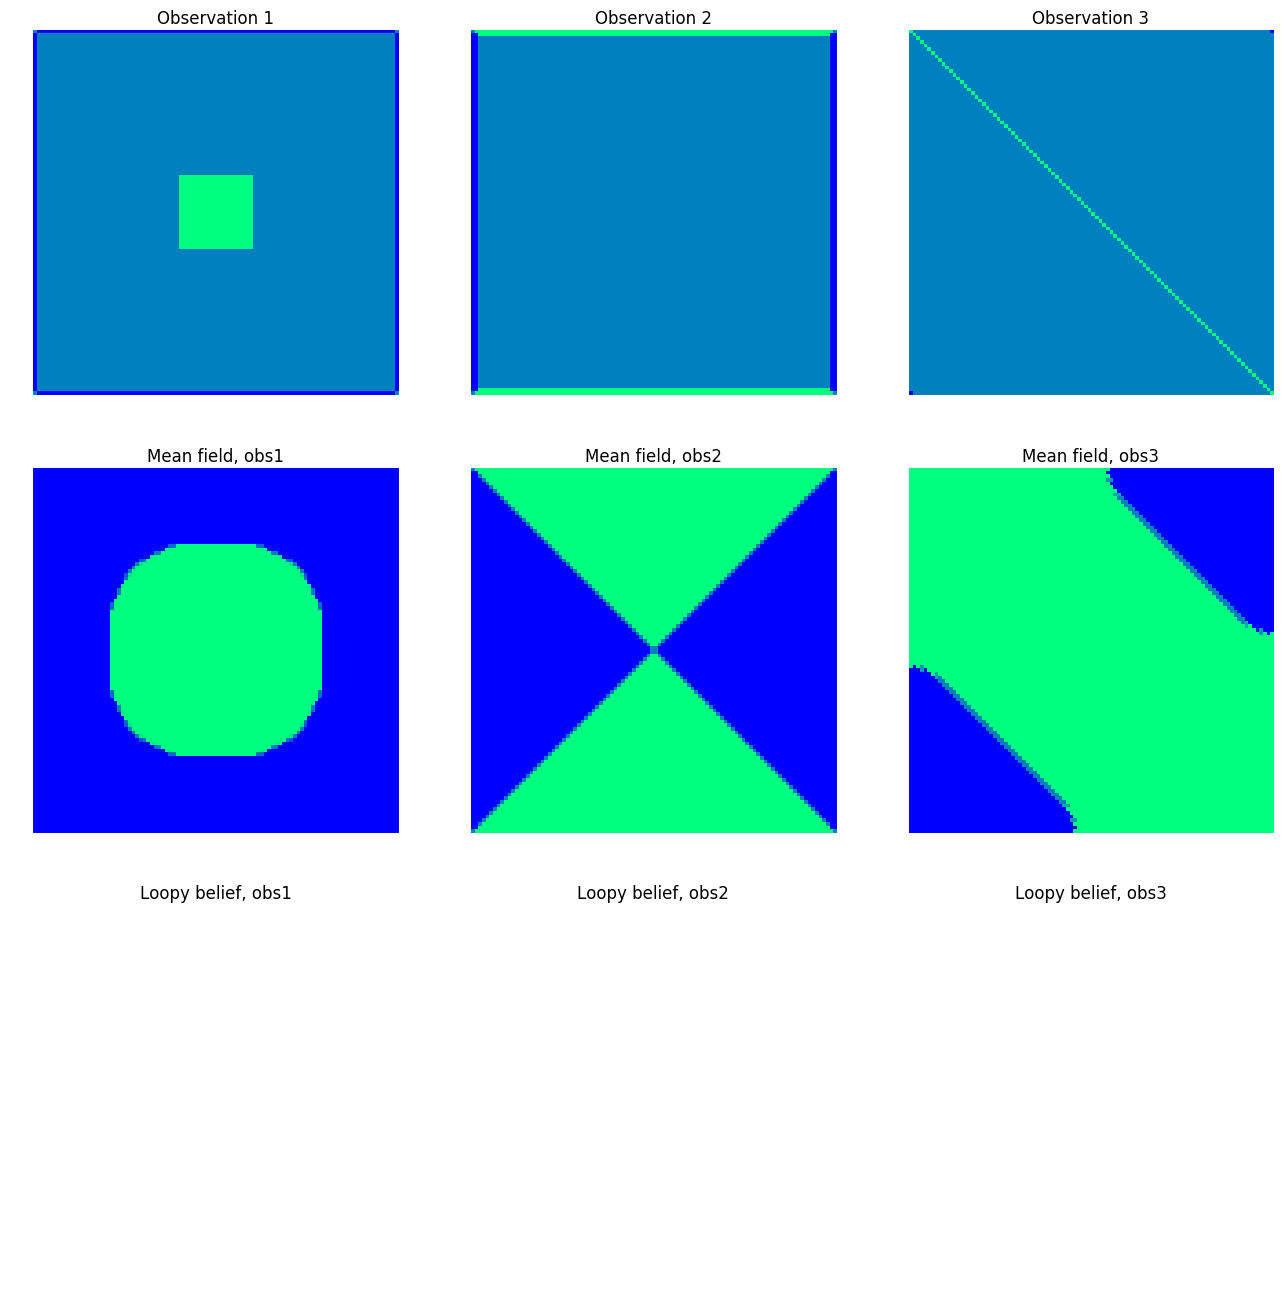

In [4]:
model = IsingGrid(100, 100)
model.constant_init(0,3,3)
grid = np.zeros((model.height, model.width))
#model.linear_factors = model.gibbs_sampling(model.random_grid(0.5))[0]/100

max_iter_mf = 500
max_iter_lb = 200

plt.figure(figsize=(16,16))

plt.subplot(331)
plt.imshow(observation1, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Observation 1')
plt.axis('off')
plt.subplot(332)
plt.imshow(observation2, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Observation 2')
plt.axis('off')
plt.subplot(333)
plt.imshow(observation3, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Observation 3')
plt.axis('off')

model.observe(observation1)
plt.subplot(334)
mlist1 = model.meanfields(grid, max_iter=max_iter_mf)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Mean field, obs1')
plt.axis('off')
plt.subplot(337)
mess_list1 = model.loopybelief(max_iter=max_iter_lb)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Loopy belief, obs1')
plt.axis('off')

model.observe(observation2)
plt.subplot(335)
mlist2 = model.meanfields(grid, max_iter=max_iter_mf)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Mean field, obs2')
plt.axis('off')
plt.subplot(338)
mess_list2 = model.loopybelief(max_iter=max_iter_lb)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Loopy belief, obs2')
plt.axis('off')


model.observe(observation3)
plt.subplot(336)
mlist3 = model.meanfields(grid, max_iter=max_iter_mf)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Mean field, obs3')
plt.axis('off')
plt.subplot(339)
mess_list3 = model.loopybelief(max_iter=max_iter_lb)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Loopy belief, obs3')
plt.axis('off')

plt.savefig('images/compare_mf_lb_3.png')

NameError: name 'observation2' is not defined

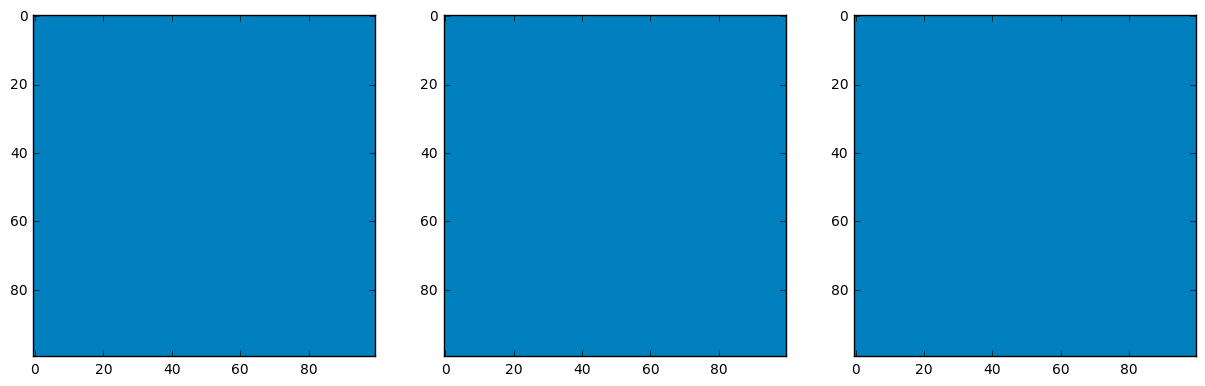

In [26]:
model = IsingGrid(100, 100)
model.constant_init(0,3,3)
grid = np.zeros((model.height, model.width))
#model.linear_factors = model.gibbs_sampling(model.random_grid(0.5))[0]/100
plt.figure(figsize=(15,15))

plt.subplot(331)
plt.imshow(model.linear_factors, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

mlist = model.meanfields(grid)
plt.subplot(332)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.loopybelief(max_iter=100)
plt.subplot(333)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation2)
mlist1 = model.meanfields(grid, max_iter=500)
plt.subplot(334)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation1)
mlist2 = model.meanfields(grid, max_iter=500)
plt.subplot(335)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation3)
mlist3 = model.meanfields(grid, max_iter=500)
plt.subplot(336)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation2)
model.loopybelief(max_iter=100)
plt.subplot(337)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation1)
model.loopybelief(max_iter=100)
plt.subplot(338)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation3)
model.loopybelief(max_iter=100)
plt.subplot(339)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

#plt.savefig('images/')

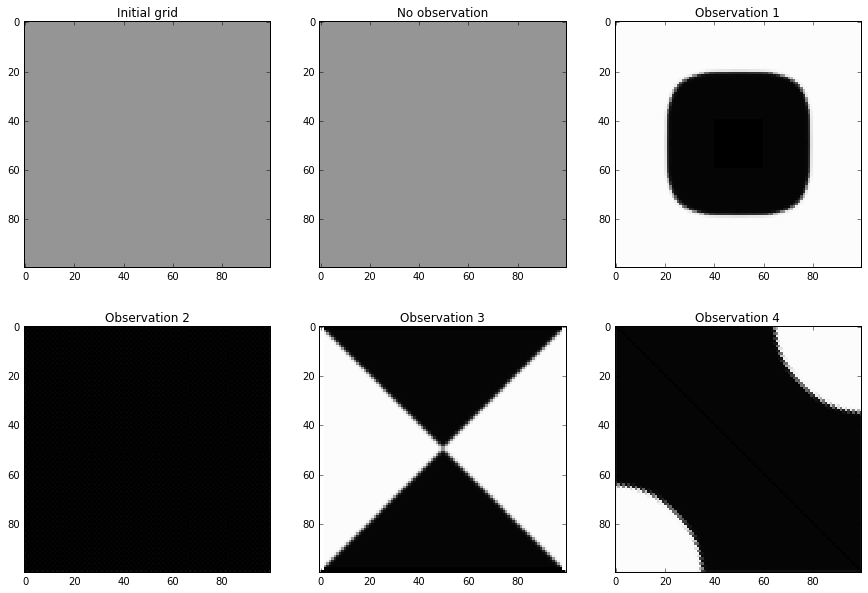

In [41]:
model = IsingGrid(100, 100)
model.constant_init(0,1,1)
grid = np.zeros((model.height, model.width))
#model.linear_factors = model.gibbs_sampling(model.random_grid(0.5))[0]/100


    
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.title('Initial grid')
plt.imshow(model.linear_factors, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

mlist = model.meanfields(grid)
plt.subplot(232)
plt.title('No observation')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation1)
mlist1 = model.meanfields(grid, max_iter=500)
plt.subplot(233)
plt.title('Observation 1')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation2)
mlist2 = model.meanfields(grid, max_iter=500)
plt.subplot(234)
plt.title('Observation 2')

plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation3)
mlist3 = model.meanfields(grid, max_iter=500)
plt.subplot(235)
plt.title('Observation 3')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation4)
mlist3 = model.meanfields(grid, max_iter=500)
plt.subplot(236)
plt.title('Observation 4')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

plt.savefig('images/meanfields.png')

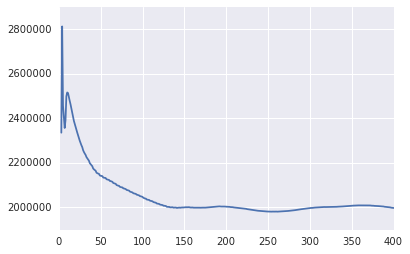

In [50]:
import pandas as pd
pd.Series(mess_list).rolling(window=4).mean().plot()

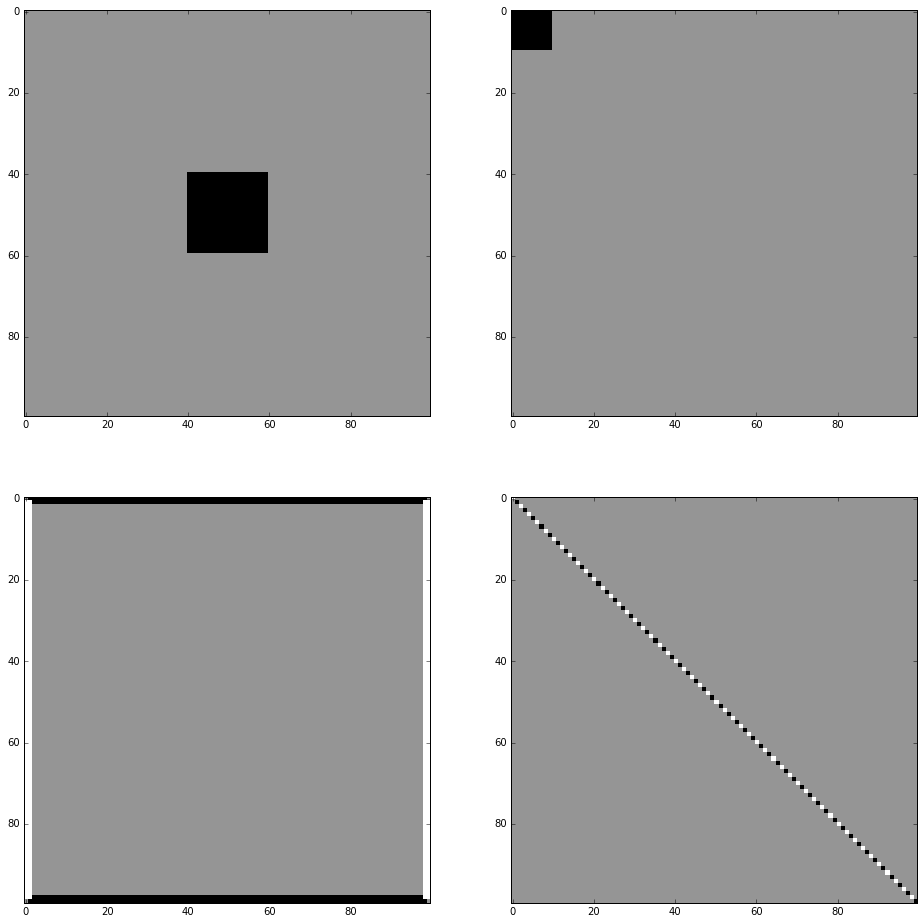

In [28]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(observation1, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.subplot(222)
plt.imshow(observation2, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.subplot(223)
plt.imshow(observation3, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.subplot(224)
plt.imshow(observation4, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.savefig('images/observations.png')